In [1300]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
from pathlib import Path
today = date.today()


In [1301]:
# File to Load
vaccine_csv_path = Path("US.csv")

# Read csv data
US = pd.read_csv("US.csv")
US


,location_key,date,place_id,wikidata_id,datacommons_id,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level,...,search_trends_xeroderma,search_trends_xerostomia,search_trends_yawn,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity
0,US,2020-01-01,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.65,0.36,0.17,-0.975309,-5.913580,6.314815,0.0,64.77,-5.790123,70.015448
1,US,2020-01-02,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.60,0.39,0.16,2.660494,-1.648148,6.709877,0.0,40.64,-0.759259,78.356538
2,US,2020-01-03,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.46,0.38,0.16,1.055556,-2.648148,5.703704,0.0,30.48,-2.475309,77.390895
3,US,2020-01-04,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.71,0.38,0.17,0.006173,-6.617284,9.197531,0.0,30.48,-5.407407,67.237910
4,US,2020-01-05,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.81,0.38,0.17,5.203704,0.543210,8.580247,0.0,NaN,-2.790123,56.438457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,US,2022-09-13,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,NaN,NaN,NaN,21.983333,12.761111,33.616667,0.0,NaN,10.966667,49.999442
987,US,2022-09-14,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,NaN,NaN,NaN,23.518519,21.407407,27.049383,0.0,NaN,12.790123,51.394811
988,US,2022-09-15,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,US,2022-09-16,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1302]:
# new data frame for time series analysis: date vs new vaccine doses administered per vaccine, clean NaN  
vaccination_df = US[['date', 'new_vaccine_doses_administered', 'new_vaccine_doses_administered_pfizer', 'new_vaccine_doses_administered_moderna', 'new_vaccine_doses_administered_janssen', 
        'new_confirmed',
        'new_confirmed_age_0',
        'new_confirmed_age_1',
        'new_confirmed_age_2',
        'new_confirmed_age_3',
        'new_confirmed_age_4',
        'new_confirmed_age_5',
        'new_confirmed_age_6',
        'new_confirmed_age_7']]
vaccination_df = vaccination_df.dropna()

# sort date chronologically
vaccination_df_clean = vaccination_df.sort_values('date', ascending=True)

# ignore NaN
vaccination_timeseries = vaccination_df_clean.dropna()

vaccination_timeseries


,date,new_vaccine_doses_administered,new_vaccine_doses_administered_pfizer,new_vaccine_doses_administered_moderna,new_vaccine_doses_administered_janssen,new_confirmed,new_confirmed_age_0,new_confirmed_age_1,new_confirmed_age_2,new_confirmed_age_3,new_confirmed_age_4,new_confirmed_age_5,new_confirmed_age_6,new_confirmed_age_7
433,2021-03-09,2721218.0,803936.0,699045.0,99591.0,50254.0,4056.0,8343.0,11860.0,11093.0,10388.0,10307.0,7547.0,4570.0
434,2021-03-10,3150257.0,976933.0,899906.0,150730.0,57565.0,3865.0,8326.0,11901.0,10560.0,9645.0,9713.0,6800.0,3810.0
435,2021-03-11,3462502.0,1103761.0,1198010.0,179558.0,55850.0,3139.0,6723.0,9243.0,7952.0,7107.0,7029.0,4905.0,2416.0
436,2021-03-12,3437143.0,1251480.0,1435922.0,235257.0,59922.0,2712.0,5545.0,7802.0,6735.0,5982.0,5927.0,3906.0,1797.0
437,2021-03-13,2193720.0,0.0,0.0,0.0,48190.0,2301.0,5291.0,7506.0,6786.0,5833.0,5584.0,3781.0,1723.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,2022-08-19,205303.0,0.0,0.0,0.0,128421.0,7337.0,7062.0,10190.0,10636.0,9235.0,9605.0,8253.0,6097.0
962,2022-08-20,84420.0,0.0,0.0,0.0,27009.0,5226.0,4979.0,6566.0,6914.0,5980.0,5966.0,5397.0,4021.0
963,2022-08-21,42334.0,0.0,0.0,0.0,21653.0,3655.0,3590.0,4666.0,4912.0,4155.0,4089.0,3776.0,2626.0
964,2022-08-22,159796.0,0.0,0.0,0.0,85282.0,7088.0,6977.0,10581.0,11298.0,9648.0,10068.0,8991.0,6370.0


In [1303]:
#convert date to string
vaccination_df_clean['DateTypeCol'] = pd.to_datetime(vaccination_df_clean['date'])
vaccination_df_clean['ConvertedDate'] = vaccination_df_clean['DateTypeCol'].dt.strftime('%Y-%m')

# ignore NaN
vaccination_timeseries = vaccination_df_clean.dropna()

# rename ConvertedDate column to date_str
vaccination_timeseries = vaccination_df_clean.rename(columns={'ConvertedDate': 'date_str'})

vaccination_timeseries
# note: negative valuesindicate a correction or an adjustment in how counts were measured

,date,new_vaccine_doses_administered,new_vaccine_doses_administered_pfizer,new_vaccine_doses_administered_moderna,new_vaccine_doses_administered_janssen,new_confirmed,new_confirmed_age_0,new_confirmed_age_1,new_confirmed_age_2,new_confirmed_age_3,new_confirmed_age_4,new_confirmed_age_5,new_confirmed_age_6,new_confirmed_age_7,DateTypeCol,date_str
433,2021-03-09,2721218.0,803936.0,699045.0,99591.0,50254.0,4056.0,8343.0,11860.0,11093.0,10388.0,10307.0,7547.0,4570.0,2021-03-09,2021-03
434,2021-03-10,3150257.0,976933.0,899906.0,150730.0,57565.0,3865.0,8326.0,11901.0,10560.0,9645.0,9713.0,6800.0,3810.0,2021-03-10,2021-03
435,2021-03-11,3462502.0,1103761.0,1198010.0,179558.0,55850.0,3139.0,6723.0,9243.0,7952.0,7107.0,7029.0,4905.0,2416.0,2021-03-11,2021-03
436,2021-03-12,3437143.0,1251480.0,1435922.0,235257.0,59922.0,2712.0,5545.0,7802.0,6735.0,5982.0,5927.0,3906.0,1797.0,2021-03-12,2021-03
437,2021-03-13,2193720.0,0.0,0.0,0.0,48190.0,2301.0,5291.0,7506.0,6786.0,5833.0,5584.0,3781.0,1723.0,2021-03-13,2021-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,2022-08-19,205303.0,0.0,0.0,0.0,128421.0,7337.0,7062.0,10190.0,10636.0,9235.0,9605.0,8253.0,6097.0,2022-08-19,2022-08
962,2022-08-20,84420.0,0.0,0.0,0.0,27009.0,5226.0,4979.0,6566.0,6914.0,5980.0,5966.0,5397.0,4021.0,2022-08-20,2022-08
963,2022-08-21,42334.0,0.0,0.0,0.0,21653.0,3655.0,3590.0,4666.0,4912.0,4155.0,4089.0,3776.0,2626.0,2022-08-21,2022-08
964,2022-08-22,159796.0,0.0,0.0,0.0,85282.0,7088.0,6977.0,10581.0,11298.0,9648.0,10068.0,8991.0,6370.0,2022-08-22,2022-08


In [1304]:
# Group by Date chronologically
vaccination_timeseries_sorted = vaccination_timeseries.sort_values('date_str', ascending=True)

# drop other date columns
vaccination_timeseries = vaccination_timeseries_sorted[['date_str', 
                                                    'new_vaccine_doses_administered', 
                                                    'new_vaccine_doses_administered_pfizer', 
                                                    'new_vaccine_doses_administered_moderna', 
                                                    'new_vaccine_doses_administered_janssen']]
vaccination_timeseries


,date_str,new_vaccine_doses_administered,new_vaccine_doses_administered_pfizer,new_vaccine_doses_administered_moderna,new_vaccine_doses_administered_janssen
433,2021-03,2721218.0,803936.0,699045.0,99591.0
455,2021-03,4165226.0,1505022.0,1072943.0,91456.0
454,2021-03,3583688.0,1048865.0,680163.0,60239.0
453,2021-03,2831562.0,1356914.0,928403.0,64706.0
452,2021-03,1210109.0,1734892.0,1438107.0,108259.0
...,...,...,...,...,...
944,2022-08,251816.0,0.0,0.0,0.0
943,2022-08,236099.0,0.0,0.0,0.0
964,2022-08,159796.0,0.0,0.0,0.0
953,2022-08,210527.0,1205063.0,702263.0,12622.0


In [1305]:
# groupby Date and sum columns
vaccination_timeseries = vaccination_timeseries.groupby(['date_str'],as_index = False).sum()

vaccination_timeseries

,date_str,new_vaccine_doses_administered,new_vaccine_doses_administered_pfizer,new_vaccine_doses_administered_moderna,new_vaccine_doses_administered_janssen
0,2021-03,65023881.0,30067622.0,24994261.0,3098523.0
1,2021-04,90513434.0,50241487.0,34682937.0,4924026.0
2,2021-05,50663184.0,32278632.0,19907021.0,2545478.0
3,2021-06,25445235.0,20932966.0,8993954.0,1629129.0
4,2021-07,16485223.0,12696053.0,5368851.0,1003177.0
5,2021-08,24291403.0,17013462.0,6563772.0,949718.0
6,2021-09,22706564.0,15978789.0,6034123.0,641685.0
7,2021-10,29320994.0,21193063.0,7291289.0,632600.0
8,2021-11,42200075.0,20413351.0,17253436.0,998325.0
9,2021-12,46333763.0,28218519.0,17624654.0,982595.0


In [1306]:
# drop other date columns
vaccination_timeseries = vaccination_timeseries[['date_str', 
                                                    'new_vaccine_doses_administered', 
                                                    'new_vaccine_doses_administered_pfizer', 
                                                    'new_vaccine_doses_administered_moderna', 
                                                    'new_vaccine_doses_administered_janssen']]
vaccination_timeseries



,date_str,new_vaccine_doses_administered,new_vaccine_doses_administered_pfizer,new_vaccine_doses_administered_moderna,new_vaccine_doses_administered_janssen
0,2021-03,65023881.0,30067622.0,24994261.0,3098523.0
1,2021-04,90513434.0,50241487.0,34682937.0,4924026.0
2,2021-05,50663184.0,32278632.0,19907021.0,2545478.0
3,2021-06,25445235.0,20932966.0,8993954.0,1629129.0
4,2021-07,16485223.0,12696053.0,5368851.0,1003177.0
5,2021-08,24291403.0,17013462.0,6563772.0,949718.0
6,2021-09,22706564.0,15978789.0,6034123.0,641685.0
7,2021-10,29320994.0,21193063.0,7291289.0,632600.0
8,2021-11,42200075.0,20413351.0,17253436.0,998325.0
9,2021-12,46333763.0,28218519.0,17624654.0,982595.0


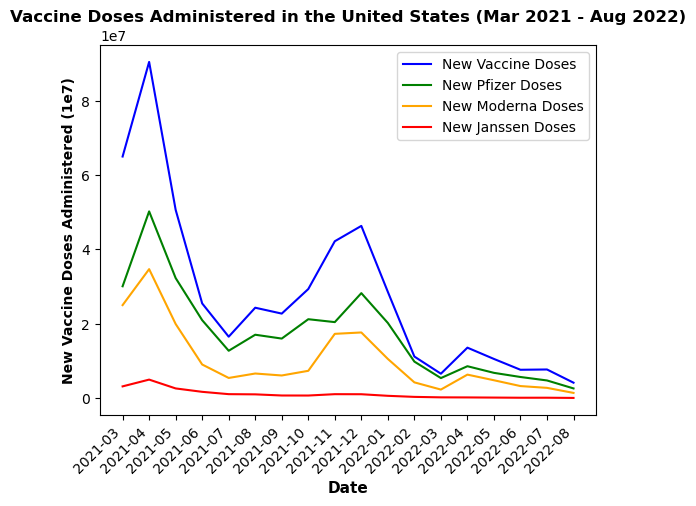

In [1307]:
# PLOTTING THE TIME SERIES
vaccination_line = plt.plot(vaccination_timeseries['date_str'], vaccination_timeseries['new_vaccine_doses_administered'], color="blue")
vaccination_line = plt.plot(vaccination_timeseries['date_str'], vaccination_timeseries['new_vaccine_doses_administered_pfizer'], color="green")
vaccination_line = plt.plot(vaccination_timeseries['date_str'], vaccination_timeseries['new_vaccine_doses_administered_moderna'], color="orange")
vaccination_line = plt.plot(vaccination_timeseries['date_str'], vaccination_timeseries['new_vaccine_doses_administered_janssen'], color="red")

#title
plt.title('Vaccine Doses Administered in the United States (Mar 2021 - Aug 2022)')
plt.title('Vaccine Doses Administered in the United States (Mar 2021 - Aug 2022)', fontweight='bold')

# x axis label
plt.xlabel('Date')
plt.xlabel('Date', fontweight='bold')
plt.xlabel('Date', fontsize=11)
plt.xticks(vaccination_timeseries['date_str'], rotation=45, ha='right')

# y axis label
plt.ylabel('New Vaccine Doses Administered (1e7)')
plt.ylabel('New Vaccine Doses Administered (1e7)', fontweight='bold')


# legend
plt.legend(["New Vaccine Doses", "New Pfizer Doses", "New Moderna Doses", "New Janssen Doses"])

plt.savefig('Vaccines Administered by Type')
plt.show()

In [1298]:
# rename columns
vaccination_timeseries = vaccination_timeseries.rename(columns={'new_vaccine_doses_administered': 'New Vaccine Doses'})
vaccination_timeseries = vaccination_timeseries.rename(columns={'new_vaccine_doses_administered_pfizer': 'New Pfizer Doses'})
vaccination_timeseries = vaccination_timeseries.rename(columns={'new_vaccine_doses_administered_moderna': 'New Moderna Doses'})
vaccination_timeseries = vaccination_timeseries.rename(columns={'new_vaccine_doses_administered_janssen': 'New Janssen Doses'})

# summing columns
vaccine_pie = vaccination_timeseries.sum()
vaccine_pie


date_str             2021-032021-042021-052021-062021-072021-082021...
New Vaccine Doses                                          502529777.0
New Pfizer Doses                                           312465693.0
New Moderna Doses                                          183856958.0
New Janssen Doses                                           18647703.0
dtype: object

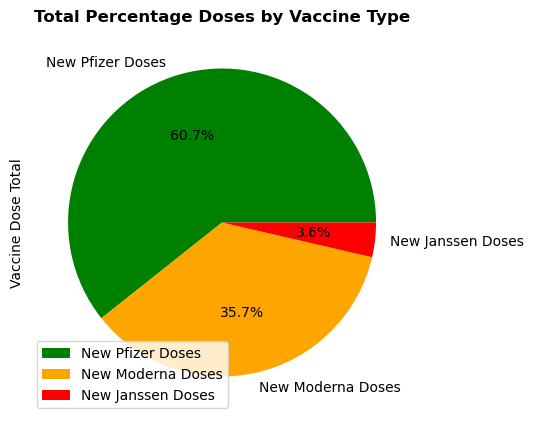

In [1299]:
# generate pie
vaccine_pie = pd.DataFrame({'Vaccine Types': [ 'New Pfizer Doses', 'New Moderna Doses', 'New Janssen Doses'],
                   'Vaccine Dose Total': [int(vaccine_pie['New Pfizer Doses']), int(vaccine_pie['New Moderna Doses']), int(vaccine_pie['New Janssen Doses'])]})
plot = vaccine_pie.plot.pie(figsize=(5, 5), autopct='%1.1f%%', y='Vaccine Dose Total', labels=vaccine_pie['Vaccine Types'], colors=['green', 'orange', 'red'])
plt.title('Total Percentage Doses by Vaccine Type', fontweight='bold')
plt.savefig('Total % Vaccine Types')


In [1288]:
# new data frame for time series analysis: date vs new vaccine doses administered per vaccine, clean NaN  
confirmed_cases_df = vaccination_df.drop(['date', 
    'new_confirmed',
    'new_vaccine_doses_administered', 
    'new_vaccine_doses_administered_pfizer', 
    'new_vaccine_doses_administered_moderna', 
    'new_vaccine_doses_administered_janssen'], axis=1)

# rename columes  
confirmed_cases_df = confirmed_cases_df.rename(columns={'new_confirmed_age_0': '0-9'})
confirmed_cases_df = confirmed_cases_df.rename(columns={'new_confirmed_age_1': '10-19'})
confirmed_cases_df = confirmed_cases_df.rename(columns={'new_confirmed_age_2': '20-29'})
confirmed_cases_df = confirmed_cases_df.rename(columns={'new_confirmed_age_3': '30-39'})
confirmed_cases_df = confirmed_cases_df.rename(columns={'new_confirmed_age_4': '40-49'})
confirmed_cases_df = confirmed_cases_df.rename(columns={'new_confirmed_age_5': '50-59'})
confirmed_cases_df = confirmed_cases_df.rename(columns={'new_confirmed_age_6': '60-69'})
confirmed_cases_df = confirmed_cases_df.rename(columns={'new_confirmed_age_7': '70-79'})

confirmed_cases_df = confirmed_cases_df.sum()
confirmed_cases_df



0-9       5144397.0
10-19     7490348.0
20-29    10052895.0
30-39     9839273.0
40-49     8197794.0
50-59     7377113.0
60-69     5357333.0
70-79     2970827.0
dtype: float64

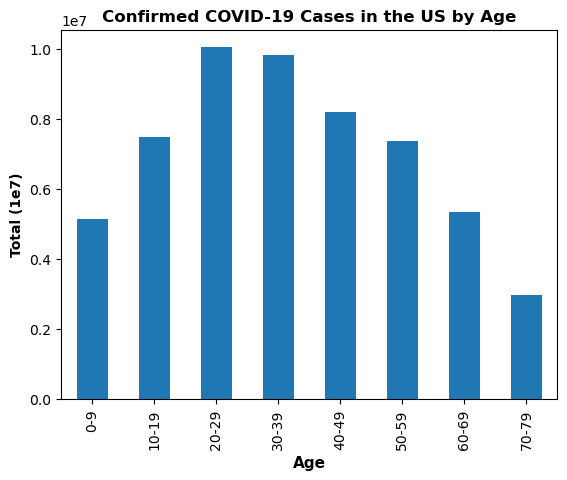

In [1289]:
# bar graph
confirmed_cases_df.plot.bar(color='b')

# tite label
plt.title('Confirmed COVID-19 Cases in the US by Age')
plt.title('Confirmed COVID-19 Cases in the US by Age', fontweight='bold')

# x axis label
plt.xlabel('Age', fontweight='bold', fontsize=11)
ax = confirmed_cases_df.plot.bar()

# y axis label
plt.ylabel('Total (1e7)')
plt.ylabel('Total (1e7)', fontweight='bold')

plt.savefig('Confirmed Cases by Age')
plt.show()


In [1276]:
vaccine_infection_df = vaccination_timeseries_sorted[['date_str', 
                                                    'new_vaccine_doses_administered', 
                                                    'new_confirmed']]

                                                    
vaccine_infection_df = vaccine_infection_df.groupby(['date_str'],as_index = False).sum()
vaccine_infection_df

,date_str,new_vaccine_doses_administered,new_confirmed
0,2021-03,65023881.0,1258053.0
1,2021-04,90513434.0,1767077.0
2,2021-05,50663184.0,878531.0
3,2021-06,25445235.0,386538.0
4,2021-07,16485223.0,1360032.0
5,2021-08,24291403.0,4199469.0
6,2021-09,22706564.0,4059766.0
7,2021-10,29320994.0,2406511.0
8,2021-11,42200075.0,2524765.0
9,2021-12,46333763.0,5988537.0


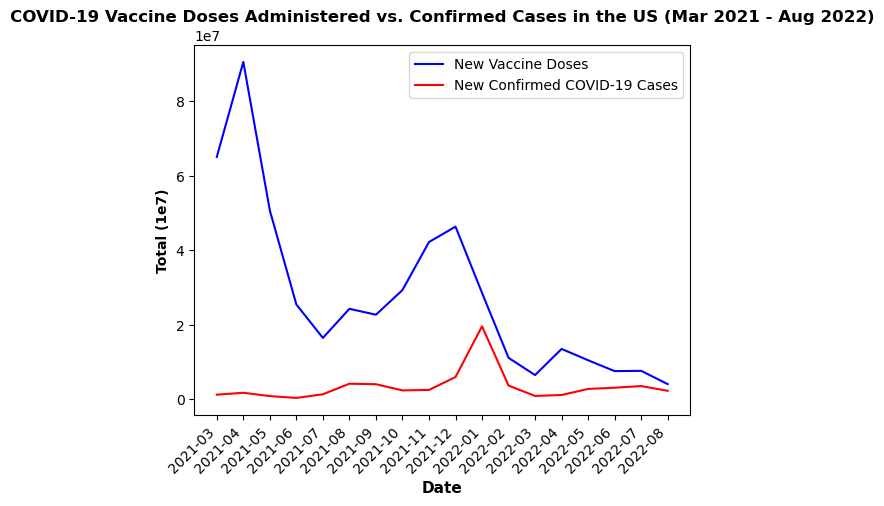

In [1277]:
# PLOTTING THE TIME SERIES
vaccine_infection_line = plt.plot(vaccine_infection_df['date_str'], vaccine_infection_df['new_vaccine_doses_administered'], color="blue")
vaccine_infection_line = plt.plot(vaccine_infection_df['date_str'], vaccine_infection_df['new_confirmed'], color="red")

#title
plt.title('COVID-19 Vaccines Administered vs. Confirmed Cases in the US (Mar 2021 - Aug 2022)')
plt.title('COVID-19 Vaccine Doses Administered vs. Confirmed Cases in the US (Mar 2021 - Aug 2022)', fontweight='bold')

# x axis label
plt.xlabel('Date')
plt.xlabel('Date', fontweight='bold')
plt.xlabel('Date', fontsize=11)
plt.xticks(vaccine_infection_df['date_str'], rotation=45, ha='right')

# y axis label
plt.ylabel('Total (1e7)')
plt.ylabel('Total (1e7)', fontweight='bold')


# legend
plt.legend(["New Vaccine Doses", "New Confirmed COVID-19 Cases"])

plt.savefig('Vaccine Doses vs Confirmed Cases')
plt.show()